# Linear Regression

A linear regression model makes a prediction by computing the weigthed
sum of the input features, plus a constant called the bias term

$$

\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x2 + ... + \theta_nx_n
$$ (Equation 4.1 Linear Regresion model prediction)

where
* $\hat{y}$ is the predicted value
* $n$ is the number of features
* $ x_i $ is the ith feature value.
* $\theta_j$ is the jth model parameter (including the bias weight $ \theta_0$ and the feature weights $\theta_1$, 
$\theta_2$, etc)

Using a vectorized form, we can write this equation more consicely:

$$
\hat{y} = h_\theta(\bold{x}) = \theta^T \cdot \bold{x}
$$ (Equation 4.2)

where:
* $ \theta $ is the model's parameter vector, containing bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$
* $ \theta^T$ is the transpose of $\theta$ ( a row vector instead of a column vector)
* $\bold{x}$ is the instance's feature vector, containing $x_0$ to $x_n$ where $x_0$ is always equal to $1$

Training this model means to find the $\theta$ parameters that best fits the training set. To measure how well the model
fits the training data, we use the RMSE (Root Mean Square Error), given by

$$
RMSE(\bold{x}, \bold{y}) = \sqrt{\sum_{i=1}^{n}{\frac{(x_i - y_i)^2}{n}}}
$$ (Equation 2.1)

It is often best to leave the root behind and only compute the MSE. For the Linear Regression Model,
the MSE is given by

$$

MSE(\bold{X}, \it{h_\theta}) = \frac{1}{m}\sum_{i=1}^{m}{(\theta^T \cdot \bold{x_i} - \bold{y_i})^2}

$$ (Eq_4.3)

In this case, $\bold{x_i}$ and $\bold{y_i}$ are vectors and $\bold{X}$ is our DataSet

There is a closed form solution to this equation, given by

$$

\hat{\theta} = (\bold{X}^T \cdot \bold{X})^{-1} \cdot \bold{X}^T \cdot \bold{y}

$$ (Eq_4.4)

Equation {eq} `Eq_4.4` is obtained from minimizing MSE for 2 $\theta$ parameters
by taking the gradient of MSE and finding where each of the components are equal to 0

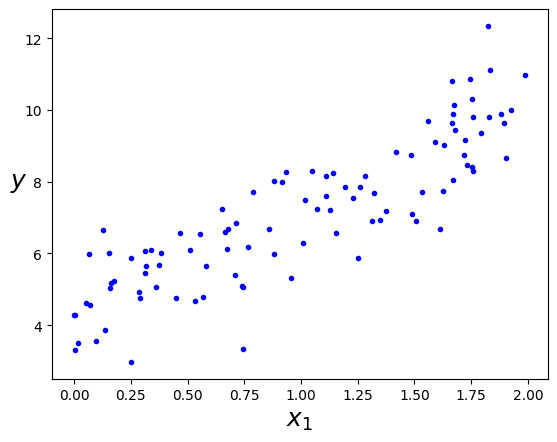

Theta hat:  [[4.2664128 ]
 [2.86036119]]
Predictions:  [[4.2664128 ]
 [9.98713518]]


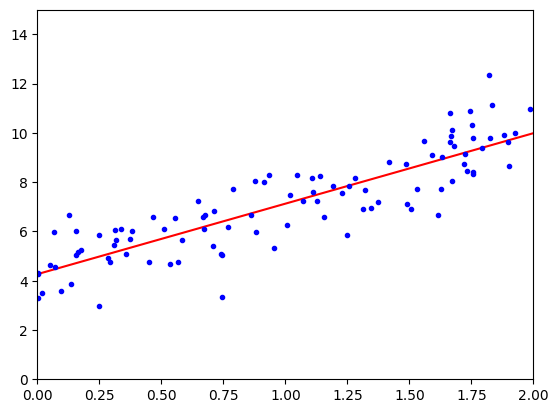

In [13]:
# Lets see how this solution looks like in python
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100, 1) # generate 100 random numbers between 0 and 2 and stores them as a column vector
y = 4 + 3 * X + np.random.randn(100, 1)

# plot x and y
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

# Now lets compute the theta hat using the normal equation
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance. This is the bias term, so our input has 1 feature and 1 bias term
# np.lingalg.inv() is used to compute the inverse of a matrix
# np.dot() is used to compute the dot product of two matrices
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# The actual function that we used to generate the data is y = 4 + 3x + Gaussian noise
# Lets see what our theta hat is
print("Theta hat: ", theta_best)

# Now we can make predictions using theta hat
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print("Predictions: ", y_predict)

# Lets plot the model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# Gradient Descent

$$
\nabla_\theta MSE(\theta) = 
\begin{bmatrix}
\\\
\frac{\partial MSE(\theta)}{\partial \theta_0} \\\ \\\
\frac{\partial MSE(\theta)}{\partial \theta_1} \\\ \\\
... \\\ \\\
... \\\ \\\
\frac{\partial MSE(\theta)}{\partial \theta_n} \\\
\end{bmatrix} = 

\frac{2}{m} \bold{X}^T \cdot (\bold{X} \cdot \theta - \bold{y})

$$ (Eq 4.6: Gradient Vector of the MSE cost function)

With the gradient vector, which points uphill, we can go in the opposite direction , which means substracting from
$ \nabla_\theta MSE(\theta)$ a scaled by $\eta$ version of $\theta$.

$$

\theta^{(step_i)} = \theta - \eta \nabla_{\theta_{step_{i - 1}}} MSE(\theta_{step_{i - 1}})

$$ (Eq 4.7: Gradient Descent Step)

In [14]:
# Implement the gradient descent algorithm
eta = 0.1  # learning rate
n_iterations = 1000
m = 100 # number of training instances

theta = np.random.randn(2, 1)  # random initialization
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot((X_b.dot(theta)) - y)
    theta = theta - eta * gradients

print("Theta hat using gradient descent: ", theta)

Theta hat using gradient descent:  [[4.2664128 ]
 [2.86036119]]


## Convergence Rate
When the cost function is convex (the line between any given two points does not intersects any other point of the function) and its slope does not change abruptly, it can be shown that Batch Gradient Descent with a fixed learning rate has a convergence rate of $ O(\frac{1}{iterations})$.

BATCH Gradient Descent uses the entire dataset at each iteration, which make it very slow. The other side of the coin is Stochastic Gradient Descent, where at each iteration, we pick a random sample of the dataset and use it. The main advantage is speed and the hability to jump out of local minima in irregular functions, but at the cost of never settle down on a global optimum.

One solution is called Simulated annealing, where we start with a large learning rate and gradually reduce it. This helps the algorithm to iterate quickly and jump out of local minimas while allowing it to reach the optimum eventually. Again, learning rate can not be reduced too quickly because we might get stuck at a local minima or end up frozen half way towards it. If we reduce learning rate too slowly, then we might end up jumping around an optimum.

In [15]:
# Stochastic Gradient Descent using a simple learning schedule
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    # This function reduces the learning rate as the number of epochs increases:
    return t0 / (t + t1)

# random initialization
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print("Theta hat using stochastic gradient descent with a simple learning schedule: ", theta)


Theta hat using stochastic gradient descent with a simple learning schedule:  [[4.2585911 ]
 [2.94765371]]


# Polinomial Regression
Linear models can be used to fit non-linear data. The way to achieve this is to add powers of each feature as new features, i.e, making this a polinomial
model.

We can use PolinoamialFeatures of sklearn for this. PolinomialFeatures(degree=d) transforms an array containing $n$ features into an array
containing $\frac{(n + d)!}{d!n!}$ features, i.e, all the combinations of the existing features until degree $d$. If we have features $a$ and $b$, and degree 3,
we will get the following new features:

$$
    a^2, b^2, a^3, b^3, ab, a^2b, a^3b, ab^2, a^2b^2, a^3b^2, ab^3, a^2b^3, a^3b^3
$$

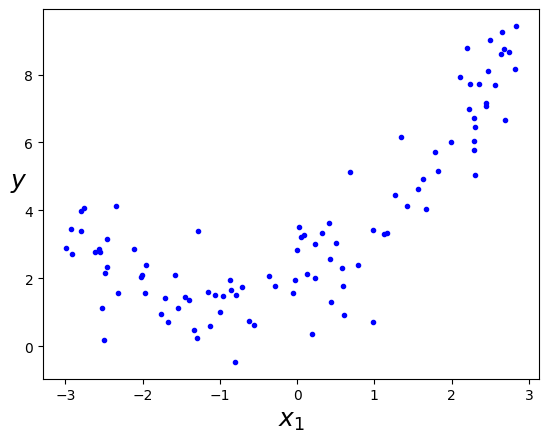

X[0]:  [0.31999243]
X_poly[0]:  [0.31999243 0.10239516]
Intercept:  [1.899733]
Coefficients:  [[1.04101183 0.51194251]]


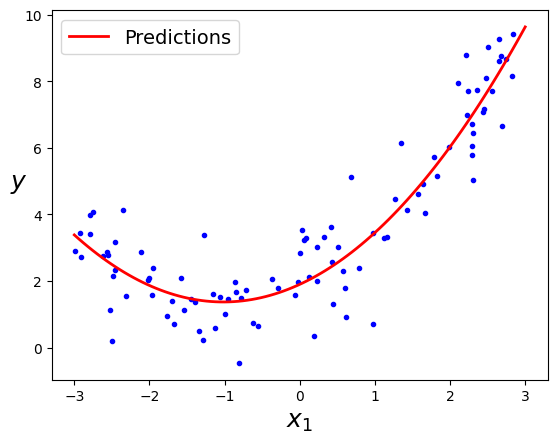

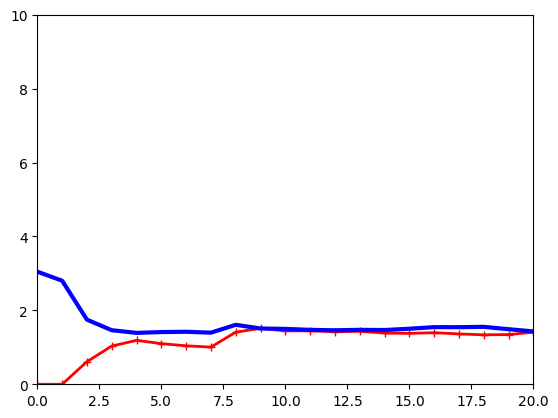

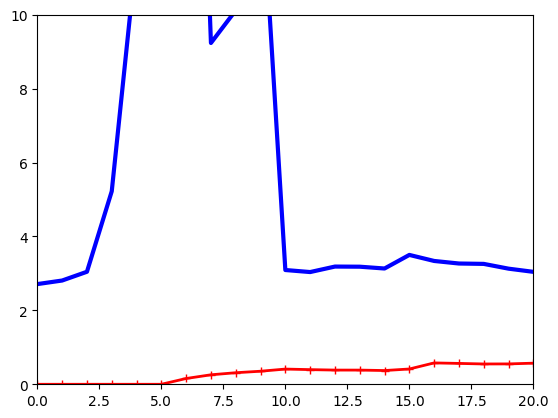

In [16]:
%matplotlib inline
# Generate some non-linear data
m = 100 # number of training instances
X = 6 * np.random.rand(m, 1) - 3 # generate 100 random numbers between -3 and 3 and stores them as a column vector
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1) # generate y = 0.5x^2 + x + 2 + Gaussian noise

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

# Clearly, a straight line will never fit this data properly. So lets use Scikit-Learn's PolynomialFeatures class to transform our training data, 
# adding the square (2nd-degree polynomial) of each feature in the training set as new features
from sklearn.preprocessing import  PolynomialFeatures  # noqa: E402
from sklearn.linear_model import LinearRegression  # noqa: E402
poly_features = PolynomialFeatures(degree=2, include_bias=False) # degree=2 means we want to add the square of each feature
X_poly = poly_features.fit_transform(X)
print("X[0]: ", X[0])
print("X_poly[0]: ", X_poly[0])

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("Intercept: ", lin_reg.intercept_)
print("Coefficients: ", lin_reg.coef_)

# Lets plot the model's predictions
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.show()


# Learning curves

from sklearn.metrics import mean_squared_error # noqa: E402
from sklearn.model_selection import train_test_split # noqa: E402

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.xlim((0, 20))
    plt.ylim((0, 10))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.show()


plot_learning_curves(LinearRegression(), X, y)

# Use a degree 10 polynomial
from sklearn.pipeline import Pipeline # noqa: E402
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=5, include_bias=False)),
    ("sgd_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

# Logistic Regression

This is a classification algorithm. It is commonly used to estimate the probability that an instance belongs to a particular class.
If the estimated probability is greater that 50% then the model predicts that the instance belongs to that class (called the positive class) or else it predicts that it does not (i.e it belongs to the negative class, labeled "0")

## Estimating probabilities

$$
\hat{p} = h_\theta(\bold{x}) = \sigma(\theta^T \cdot \bold{x})
$$

where $\sigma(\cdot)$ is a sigmoid-function, i.e, s-shaped, that outputs a number between 0 and 1

$$
    \sigma(t) = \frac{1}{1 + e^{-t}}
$$

## Cost function
The objective of training is to set the paremeters $\bold{\theta}$ estimates high probabilities for positive instances $y=1$ and low probabilities for negative instances $y=0$

$$ 
c(\bold{\theta})=
\left\{
\begin{array}{ll}
    -log(\hat{p}) & if & y=1 \\
    -log(1 - \hat{p}) & if & y = 0

\end{array} 
\right.  $$

This is the loss function for a single instance. To compute the loss over the whole dataset, we just take the average loss cost over all instances

$$
    J(\theta) = - \frac{1}{m} \sum_{i=1}^{m}{[y^ilog(\hat{p}^i) + (1 - y^i)log(1 - \hat{p}^i)]}
$$

There is no known closed form for this equation, but the function is shown to be convex, and as such, we can use Gradient Descent. So, the partial derivative with regard to the $j^{th}$ model parameter $\theta_j$ is given by:

$$
    \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [\sigma(\theta^T \cdot \bold{x}^{(i)}) - \it{y}^{(i)}]\it{x^{(i)}_j}
$$

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


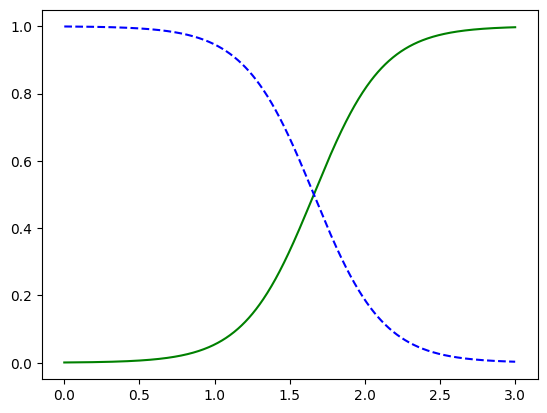

In [17]:
# Apply Logistic Regression to the iris dataset
from sklearn import datasets # noqa: E402
iris = datasets.load_iris()
print(list(iris.keys()))

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int16)  # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression # noqa: E402
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Lets look at the model's estimated probabilities for flowers with petal widths varying from 0 to 3 cm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()